In [49]:
# %matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import pyproj
import json
# import panel as pn

from ipywidgets import interact, interactive



In [7]:
df = pd.read_csv("data/dataset.csv", low_memory=False, usecols=["Year", "Consumer_type", "Installation_zone", 
                                                                "Consumption"])
df.head(5)

,Year,Consumer_type,Installation_zone,Consumption
0,2013,1,4,0
1,2013,2,6,5
2,2013,1,6,6
3,2013,1,6,1
4,2013,1,6,13


In [25]:
zonas = pd.read_excel("data/geo_data/apoio/zonas.xlsx", sheet_name="Folha1")
zonas

,Zona,Nome
0,1,Zona 1
1,3,Zona 3
2,4,Zona 4
3,6,Zona 6
4,22,Grijó de Parada
5,23,São Pedro de Sarracenos
6,24,Nogueira
7,25,"Izeda, Calvelhe e Paradinha Nova"
8,26,Pinela
9,27,Castro de Avelãs


In [26]:

pt = gpd.read_file('data/geo_data/shp/freguesias/freguesias.shp')
br = pt[pt['Concelho'] == 'BRAGANÇA']
br = br.replace({'Freguesia': "União das freguesias de Izeda, Calvelhe e Paradinha Nova"}, "Izeda, Calvelhe e Paradinha Nova") 
br = br.replace({'Freguesia':"União das freguesias de São Julião de Palácios e Deilão"}, "São Julião de Palácios e Deilão")
br = br.replace({'Freguesia': "União das freguesias de Sé, Santa Maria e Meixedo"}, "Sé, Santa Maria e Meixedo")
br = br.replace({'Freguesia': "União das freguesias de Castrelos e Carrazedo"}, "Castrelos e Carrazedo")
br = br.replace({'Freguesia': "União das freguesias de Rio Frio e Milhão"}, "Rio Frio e Milhão")
br = br.replace({'Freguesia': "União das freguesias de Parada e Faílde"}, "Parada e Faílde")
br = br.replace({'Freguesia': "União das freguesias de Rebordainhos e Pombares"},"Rebordainhos e Pombares")
br = br.replace({'Freguesia': "União das freguesias de Aveleda e Rio de Onor"},"Aveleda e Rio de Onor")
br = br.drop(['Dicofre', 'Concelho', 'Distrito', 'TAA', 'AREA_EA_Ha', 'AREA_T_Ha', 'Des_Simpli'], axis=1)
br



,Freguesia,geometry
1534,"Izeda, Calvelhe e Paradinha Nova","POLYGON ((119204.378 219802.954, 119451.422 21..."
1563,Parâmio,"POLYGON ((103908.514 244201.752, 103896.855 24..."
1566,Espinhosela,"POLYGON ((108007.360 253488.354, 108342.446 25..."
1572,Carragosa,"POLYGON ((112702.966 249568.229, 112703.716 24..."
1575,Aveleda e Rio de Onor,"POLYGON ((129644.555 247181.101, 129638.015 24..."
1586,França,"POLYGON ((118334.358 252725.534, 118389.008 25..."
2799,Macedo do Mato,"POLYGON ((116063.986 215012.545, 116062.396 21..."
2841,Sendas,"POLYGON ((111239.342 217480.891, 111220.232 21..."
2851,Quintela de Lampaças,"POLYGON ((105820.791 221425.484, 105799.702 22..."
2861,Salsas,"POLYGON ((114247.449 221357.354, 114235.480 22..."


<AxesSubplot:>

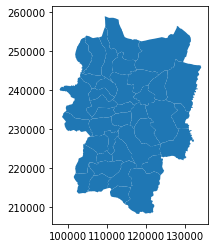

In [48]:
br.plot()

In [27]:
zona = br.merge(zonas, left_on='Freguesia', right_on='Nome')
# zona.head()

zona = br.merge(zonas, left_on='Freguesia', right_on='Nome')
zona = zona.drop(columns = ['Freguesia'])
zona.head()

,geometry,Zona,Nome
0,"POLYGON ((119204.378 219802.954, 119451.422 21...",25,"Izeda, Calvelhe e Paradinha Nova"
1,"POLYGON ((119204.378 219802.954, 119451.422 21...",54,"Izeda, Calvelhe e Paradinha Nova"
2,"POLYGON ((119204.378 219802.954, 119451.422 21...",65,"Izeda, Calvelhe e Paradinha Nova"
3,"POLYGON ((103908.514 244201.752, 103896.855 24...",66,Parâmio
4,"POLYGON ((108007.360 253488.354, 108342.446 25...",40,Espinhosela


In [11]:
tick_labels = {'0': '0', '5': '0.1', '10':'0.2', '15':'0.4', '20':'0.6', '25':'0.7', 
               '30':'0.8','35':'0.9', '40':'1'}
anos = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [52]:
map_anos = []
for ano in anos:
    ano = df[df['Year'] == ano]
    ano = ano.drop(columns=['Year', 'Consumer_type'])
    zona_ano = zonas.merge(ano, left_on = 'Zona', right_on='Installation_zone')
    zona_ano = zona_ano.drop(columns=['Zona', 'Installation_zone'])
    zona_ano = zona_ano.groupby(['Nome']).sum()
    ano = zona_ano.reset_index()
    ano = ano.rename(columns={'Nome' : 'Name'})
    ano['Consumption'] = ((ano['Consumption'] - ano['Consumption'].min()) / (ano['Consumption'].max() - ano['Consumption'].min()))*1000
    ano = ano.merge(br, left_on = 'Name', right_on = 'Freguesia')
    ano = ano.drop(columns=['Freguesia'])
    ano = ano.rename(columns = {'geometry' : 'Coordinates'})
    map_anos.append(ano)
map_anos[0].head()


,Name,Consumption,Coordinates
0,Alfaião,4.173900,"POLYGON ((120049.534 236045.726, 120026.942 23..."
1,Aveleda e Rio de Onor,20.869501,"POLYGON ((129644.555 247181.101, 129638.015 24..."
2,Babe,9.855590,"POLYGON ((125455.441 244980.566, 125577.860 24..."
3,Baçal,23.749803,"POLYGON ((123527.913 244030.901, 123129.468 24..."
4,Carragosa,5.134940,"POLYGON ((112702.966 249568.229, 112703.716 24..."


In [53]:
anos_dict = {2013:0, 2014:1, 2015:2, 2016:3, 2017:4, 2018:5, 2019:6, 2020:7}
def choose_year(year):
    return anos_dict[year]

def get_json(year):
    ind = choose_year(year)
    df_ano_json = json.loads(map_anos[ind].to_json())
    df_ano_json = json.dumps(df_ano_json)
    return df_ano_json

In [54]:
def make_plot(): 
    tick_labels = {'0': '0', '5': '0.1', '10':'0.2', '15':'0.4', '20':'0.6', '25':'0.7', 
               '30':'0.8','35':'0.9', '40':'1'}
    palette = brewer['YlGnBu'][8]
    palette = palette[::-1]
    hover = HoverTool(tooltips = [ ('Freguesia','@Nome'),('% consumo', '@Consumo')])
    color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color= '#d9d9d9')
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 300, height = 20,
                     border_line_color=None, location = (0,0), orientation = 'horizontal', 
                     major_label_overrides = tick_labels)
    p = figure(title = 'Agua consumo, year', plot_height = 500 , plot_width = 400, 
           toolbar_location = None, tools = [hover])
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.patches('xs','ys', source = geosource,fill_color = {'field' :'Consumo', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
    return p

In [55]:
def update_plot(attr, old, new):
    year = slider.value
    
#     new_data = GeoJSONDataSource(geojson=get_json(year))
    new_data = get_json(year)
    p = make_plot()
    # Update the layout, clear the old document and display the new document
    layout = column(p, slider)
    curdoc().clear()
    curdoc().add_root(layout)
    
    # Update the data
    geosource.geojson = new_data
    p.title.text = year

In [56]:
slider = Slider(title = 'Ano',start = 2013, end = 2020, step = 1, value = 2014)
slider.on_change('value', update_plot)

In [57]:
geosource = GeoJSONDataSource(geojson = get_json(2013))
palette = brewer['Blues'][8]
palette = palette[::-1]
p = make_plot()

D:\.conda\env\pandia\lib\site-packages\pandas\io\json\_json.py:158: ShapelyDeprecationWarning: The 'array_interface_base' property is deprecated and will be removed in Shapely 2.0.
  return dumps(
IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection



IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported b

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported b

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported b

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported b

OverflowError: Maximum recursion level reached

In [15]:
layout = row(p, slider)
curdoc().add_root(layout)
output_notebook()

Loading BokehJS ...

In [16]:
show(layout)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html

